# Binary Classification with Logistic Regression

In [355]:
# import modules for preprocessing 
import os
import skimage
from skimage import data
from skimage import io
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
import natsort
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay





## Preprocess the data

### Function image_to_vec() will:
####  - Read in the image file names in the directory and sort them in ascending order.
####  - Add the directory path to each image name, so all images can be found.
#### - Find the images using the paths.
#### - Read in the images as grayscale
#### - Convert the images into arrays
#### - Return a list of image arrays and a list of each file name.

In [345]:
imagefile_list = os.listdir('dataset/sample_images/') # dataset of 200
directory = 'dataset/sample_images/'

#print(os.getcwd()) # check current directory
#imagefile_list = os.listdir('test/image/') # test dataset of 200
#directory = 'test/image/'




# Function to take image files in dir, convert them into vectors and save them to a list

def image_to_vec(file_list, directory):    
    vec_list = []
    files = []
    for filename in file_list:
        if filename.endswith('.jpg'):
            files.append(filename)
    files = natsort.natsorted(files) # sort file names in ascending order
    #print(files)
    for file in files:
      image_path = directory+file
      #print(image_path)
      image = np.array(imread(image_path, as_gray=True)) #read in as grayscale
      vec_list.append(image)

    return vec_list,files 
   




##### 1. Read in the binary labels.

In [346]:
# Loading the csv file
tumors = pd.read_csv('./dataset/sample_labels_0_1.csv', sep=',')
#print(tumors)

#### 2. Split the file names and label data into their own lists. Run the file names and labels through the function that will find the images in the directory, and convert them into an array.

In [347]:

# Split the data
im_files = list(tumors['file_name']) # converting to list in order to access each filename
labels = tumors['label']
#print(labels)

im_vecs,filenames = image_to_vec(im_files,directory) 

# plt.imshow(im_vecs[0], cmap='gray') #check that im_vecs has image vectors in correct order


#### 3. Merge the image and label data.

In [348]:
data = list(zip(im_vecs,labels)) # join the image vectors and their respective labels
data # output should show that each array is paired with its label
print(data[0])
#print('data type',type(data))
#for i in range(len(data)):
    #print('index:',i,'label:',labels[i])


(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 1)


#### 4. Convert the image and label data into arrays X and Y.

In [349]:
# Loading the data file: 

def list_to_array(list_of_tuples): # Convert the data from list type to array
    X=[]
    Y=[]
    count=0
    for pair in list_of_tuples:
        temp=pair[0]
        temp2=pair[1]
        X.append(temp)
        Y.append(temp2)
        count+=1
        #print(count,'tuples converted to array') #comment out to see check function is running
    X=np.asarray(X)
    Y=np.asarray(Y)
    
    return X,Y

X,Y=list_to_array(data)
X=X.reshape(200,262144) # MAKE SURE THIS MATCHES COUNT OF DATA SAMPLES


# Shuffle
X, Y = shuffle(X,Y)
#print('x shape',X.shape, 'y shape',Y.shape)

#Split the data into training and test (validation) set, if there's no real test data 
##x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=0)

#print('x_train shape',x_train.shape,'y_train shape',y_train.shape)
#print('x_test shape',x_test.shape,'y_test shape',y_test.shape)

### Preprocess the test data

In [350]:
imagefile_list_test = os.listdir('test/image/') # test dataset of 200
directory_test = 'test/image/'
tumors_test = pd.read_csv('test/labels_0_1.csv', sep=',') # binary class labels
#print(tumors_test)


# Split the data
im_files_test = list(tumors_test['file_name']) # converting to list in order to access each filename
labels_test = tumors_test['label2']
#print(labels_test)



# Convert image tpo arpray
im_vecs_test,filenames_test = image_to_vec(im_files_test,directory_test) 



#plt.imshow(im_vecs_test[0], cmap='gray') #check that im_vecs has image vectors in correct order

# Join image vectors with labels
data_test = list(zip(im_vecs_test,labels_test))


# Convert list of arrays into array of arrays
X_test,Y_test=list_to_array(data_test)
X_test=X_test.reshape(200,262144) # MAKE SURE THIS MATCHES COUNT OF DATA SAMPLES

print('X_test.shape',X_test.shape,'Y_test.shape',Y_test.shape)
print('X.shape',X.shape,'Y.shape',Y.shape)


# extracting training and validation data from training dataset 
x_train, x_val, y_train, y_val = train_test_split(X, Y, train_size=0.7, random_state=0)

X_test,Y_test = shuffle(X_test,Y_test)
# extracting test data from test dataset and discarding training portion by asssigning
# it to dummy variables that won't be used.
x_dummy, x_test, y_dummy, y_test = train_test_split(X_test, Y_test, test_size=0.3, random_state=0)





X_test.shape (200, 262144) Y_test.shape (200,)
X.shape (200, 262144) Y.shape (200,)


### Define the logistic regression model

In [360]:



def sigmoid(z):
    return 1. / (1. + np.exp(-z))  # z=feature vector xTrain times parameter vector theta  


def param_update(xTrain, yTrain):
    #print('xTrain shape before',xTrain.shape) 
    new_col = np.zeros((xTrain.shape[0], 1)) 
    xTrain = np.append(xTrain, new_col, axis=1)
    #print('xTrain shape after',xTrain.shape)
    
    #initialise parameters
    theta = np.zeros(xTrain.shape[1]) 
    epoch=100
    alpha = 0.01 
   
    for i in range(epoch): # instead of epoch,loop until close to zero
        z = np.dot(xTrain, theta) # feature vector times parameter vector
        h = sigmoid(z)  
        gradient = theta - alpha * np.dot(xTrain.T,(h-yTrain))/yTrain.shape[0]
        theta = gradient 
        # print out shows at which iteration the function starts to converge
        #print('sum(gradient)',i,sum(gradient))
  
    return theta

def train_predict(xTrain, yTrain, xVal,yVal):
    xTrain = xTrain - xTrain.mean() # normalise
    #print('xVal shape before',xVal.shape) 
    theta = param_update(xTrain, yTrain)
    new_col = np.ones((xVal.shape[0], 1)) 
    xVal = np.append(xVal, new_col, axis=1)
    #print('xVal shape after',xVal.shape)
    z = np.dot(xVal,theta)
    h = sigmoid(z)
    y_pred = h >= 0.5 # true or false assignment 
    score = accuracy_score(yVal,y_pred)
    
    return y_pred, score, theta


### Train and test the model on training and validation data

In [361]:
  
y_pred,score, theta = train_predict(x_train,y_train,x_val,y_val) 
#print('Accuracy score',score)
#print('y_pred', y_pred)


#print(classification_report(y_val,y_pred)) # main classification metrics




### Define a prediction-only function

In [362]:
def predict(xTest,yTest,theta): # using value of theta learned from training model
    xTest = xTest - xTest.mean() # normalise
    new_col = np.zeros((xTest.shape[0], 1)) 
    xTest = np.append(xTest, new_col, axis=1)
    z = np.dot(xTest,theta)
    h = sigmoid(z)
    y_pred = h >= 0.5 # true or false assignment 
    score = accuracy_score(yTest,y_pred)
    
    cm = confusion_matrix(yTest,y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm)
    display.plot()
    plt.show()    
    return y_pred, score



### Prediction on unseen test data

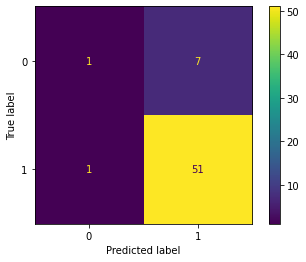

Accuracy score2 0.8666666666666667
              precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.88      0.98      0.93        52

    accuracy                           0.87        60
   macro avg       0.69      0.55      0.56        60
weighted avg       0.83      0.87      0.83        60



In [363]:
y_pred2,score2 = predict(x_test,y_test,theta)
print('Accuracy score2',score2)
print(classification_report(y_test,y_pred2))